In [1]:
# Importação das biblíotecas relevantes para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')

# Módulo 1 - Aula 2: Primeiras visualizações de dados

## 1. Aquisição e leitura de dados reais

> O DATASUS disponibiliza informações que podem servir para subsidiar  análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde.<br>
Link para o [**DATASUS**](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)

### 1.1 Importação do *valor total dos procedimentos hospitalares do SUS por UF e mês de **atendimento***

**Informações da extração:**
- [**Informações de Saúde(TABNET)**](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)
- **Localização:** Informações de Saúde(TABNET)/Assistência à Saúde/Dados Consolidados AIH (RD), por local de internação, a partir de 2008/Brasil por região e unidade de Federação
- **Data:** 18-05-2021 22:35
- **Linha:** Unidade da Federação
- **Coluna:** Ano Mês atendimento
- **Conteúdo:** Valor Total
- **Período:** *de:* Jan-2008 *até:* Mar-2021
- **Nome do arquivo:** /dados/A223850189_28_143_208(proc).csv

In [2]:
# URL do arquivo CSV
filePath = 'https://raw.githubusercontent.com/fdrigui/BootcampDataScience/main/module_one/dados/A225356189_28_143_208(atend).csv'

# Abre arquivo
df_atend = pd.read_csv(filePath, sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=12, na_values='-')
df_atend.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


### 1.2 Avaliação do tamanho do DF
- O Brasil tem 26 Estados + Distrito Federal
- 10 (Mar-Dez 1992) + 28 (anos 1993 - 2020) * 12 (meses por ano) + 3 (Jan-Mar/2021) + 1 (coluna Total) + 1 (coluna Unidade da Federação)
- de Janeiro/2008 até Março/2021 têm 13 (anos 2008 - 2020) * 12 (meses por ano) + 3 (Jan-Mar/2021) + 1 (coluna Total) + 1 (coluna Unidade da Federação)

Deveríamos ter um DataFrame de 27 linhas x 351 colunas

In [3]:
print('O número de linhas e colunas: {}'.format(df_atend.shape))

O número de linhas e colunas: (27, 287)


Temos 64 colunas de datas a menos.
Acredito que até o sistema entrar em marcha, houveram meses que não existiram registros, como por exemplo em 1992 só temos 2 meses: Mar, Abr. Já em 1993 temos 2 meses também: Maio e Dezembro.<br>
A partir de Janeiro de 2000 nós temos todas as counas, e isso não significa que temos todos os dados em todas as colunas, mais ao menos temos a coluna com algum dado.

### 1.3 Existem dados nulos (NA)?
É desejavel quue não tenhamos dados nulos em nossas tabelas, ou se tivermos, que saibamos quais são para futuro gedenciamento dos estudos

In [4]:
print('O número de células inválidas (NA) no DataFrame é: {}.'.format(df_atend.isna().sum().sum()))

O número de células inválidas (NA) no DataFrame é: 2955.


### 1.4 Uma verificação rápida nos tipos de cada coluna.
Espera-se que se tenha 1 colunatipo 'object', que é a Unidade Federativa e as demais tipo 'float' 

In [5]:
df_atend.dtypes.value_counts()

float64    286
object       1
dtype: int64

## 2. Preparação dos dados

### 2.1 Altera '/' por '-' no nome da coluna
'/' não é um caractere muito comum para se ter nos nomes das colunas.

In [6]:
df_atend.columns = df_atend.columns.str.replace('/', '-')

### 2.2 Nome da coluna 'Unidade da Federação'
A Coluna com o nome 'Unidade da Federação' é demazindo grande, com acento e composto por dois conjuntos: **Código do UF** e **Unidade da Federação**.<br>
Renomear de: ```Unidade da Federação``` para: ```uf_code_and_name```

In [7]:
df_atend = df_atend.rename(columns={'Unidade da Federação':'uf_code_and_name'})

### 2.2 Divide ```uf_name``` em ```código``` e ```unidade federativa```
Divisão dos dois conjuntos de dados em ```uf_code_and_name``` em duas colunas distintas: ```uf_code``` e ```uf_name```

In [8]:
df_atend[['uf_code', 'uf_name']] = df_atend['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})

### 2.3 Cria Dataframe de código de UF e UF
para isso nós vamos utilizar uma lista de referencia utilizada [LINK](https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html)<br>
Essa informação é importante pois os UFs não tem espaços, acentos, e são curtos, ficando melhor dispostos gráficamente.<br>
O Dicionário foi criado na mão.


In [9]:
# Cria lista na mão dos códigos UF e os UFs
uf_number_code = pd.DataFrame({"uf_code":["11", "12", "13", "14", "15", "16", "17", "21", "22", "23", "24", "25", "26", "27",
                                          "28", "29", "31", "32", "33", "35", "41", "42", "43", "50", "51", "52", "53"],
                               "uf":["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL",
                                       "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"]})

### 2.4 Cria coluna 'UF' com a abreviação
Utilizando a coluna ```uf_code``` que tem códigos únicos para cada unidade federativa, fez-se um replace, subistituindo os números das unidades pelo seu código.<br>
Ex:<br>
**uf_name:** Rondônia;<br>**uf_code:** 11;<br>**uf:** RO;

In [10]:
# Cria uma coluna com o código do UF
df_atend['uf'] = df_atend['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)

# Cria uma coluna com o código do UF como cópia da anterior. Essa aqui vai se tornar o índice da tabela
df_atend['uf_i'] = df_atend['uf']

### 2.5 Define ```df_proc['uf']``` como indice

In [11]:
df_atend = df_atend.set_index('uf_i')
df_atend.head()

,uf_code_and_name,1992-Mar,1992-Abr,1993-Mai,1993-Dez,1994-Jan,1994-Fev,1994-Mai,1994-Ago,1994-Nov,...,2020-Out,2020-Nov,2020-Dez,2021-Jan,2021-Fev,2021-Mar,Total,uf_code,uf_name,uf
uf_i,,,,,,,,,,,,,,,,,,,,,
RO,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08,11,Rondônia,RO
AC,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08,12,Acre,AC
AM,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09,13,Amazonas,AM
RR,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08,14,Roraima,RR
PA,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09,15,Pará,PA


### 2.6 Remove as colunas que tenham NaN em qualquer uma das suas céluas
Não necessáriamente os NaN precisam ser dropados do DataFrame, eles podem receber o valor médio da série, a repetição do ultimo e do próximo, uma interpolação, etc...<br>
Para esse caso, as colunas que contenham NaN foram removidas sem controle.

In [12]:
df_atend = df_atend.dropna(axis=1, how='any')
df_atend.head()

,uf_code_and_name,2007-Ago,2007-Set,2007-Out,2007-Nov,2007-Dez,2008-Jan,2008-Fev,2008-Mar,2008-Abr,...,2020-Out,2020-Nov,2020-Dez,2021-Jan,2021-Fev,2021-Mar,Total,uf_code,uf_name,uf
uf_i,,,,,,,,,,,,,,,,,,,,,
RO,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08,11,Rondônia,RO
AC,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08,12,Acre,AC
AM,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09,13,Amazonas,AM
RR,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08,14,Roraima,RR
PA,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09,15,Pará,PA


### 2.7 Será que após a exclusão de colunas, tivemos uma interrupção na sequência de datas?
Com o comando ```dropna()``` nós não temos controle da exclusão, caso tenhamos uma ou mais células com valores NaN perdidas, as colunas foram eliminadas.<br>
Como saber então se a partir de Agosto/2007 (primeira célula) ate´ Março/2021 temos todas as colunas?<br>
5 meses em 2007 Ago - Dez + 13 anos (2008 - 2020) * 12 (meses) + 3 (Jan - Mar/ 2021) = 164

In [13]:
df_atend.loc[:,'2007-Ago':'2021-Mar'].shape

(27, 164)

### 2.8 Transposição das colunas

In [14]:
df_atend = df_atend.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf_name', 'uf'], axis=1)

In [15]:
df_atend_t = df_atend.T
df_atend_t.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
2007-Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007-Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007-Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007-Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007-Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


### 2.9 Criando uma coluna tipo DataTime com os valroes do index

In [16]:
pt_eng_month = {'Jan':'Jan', 'Fev':'Feb', 'Mar':'Mar', 'Abr':'Apr', 'Mai':'May', 'Jun':'Jun', 'Jul':'Jul', 'Ago':'Aug', 'Set':'Sep', 'Out':'Oct', 'Nov':'Nov', 'Dez':'Dec'}
df_atend_t['time'] = pd.to_datetime(df_atend_t.index.to_series().replace(pt_eng_month, regex=True))
df_atend_t = df_atend_t.sort_values(by='time', axis=0, ascending=True)
df_atend_t.head()

uf_i,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,time
2007-Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47,2007-08-01
2007-Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25,2007-09-01
2007-Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56,2007-10-01
2007-Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48,2007-11-01
2007-Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42,2007-12-01


### 2.10 Selecionando estados para análise
Eu resolvi selecionar as 4 Unidades Federativas que fazem parte da região Suldeste, que são: SP, MG, RJ e ES.


In [53]:
sudeste = df_atend_t[['ES', 'MG', 'RJ', 'SP', 'time']]
sudeste.head(10)

uf_i,ES,MG,RJ,SP,time
2007-Ago,57408.11,9.713944e+05,4.694693e+05,1.665350e+06,2007-08-01
2007-Set,284224.80,2.861782e+06,9.216466e+05,4.434169e+06,2007-09-01
2007-Out,1152115.25,1.001801e+07,2.994665e+06,1.457740e+07,2007-10-01
2007-Nov,2296383.23,2.173028e+07,7.250528e+06,3.503226e+07,2007-11-01
2007-Dez,5724199.54,4.342952e+07,1.362712e+07,7.666855e+07,2007-12-01
2008-Jan,16212109.41,2.062081e+08,2.515120e+08,1.038067e+09,2008-01-01
2008-Fev,10032886.43,7.030109e+07,4.412816e+07,1.729620e+08,2008-02-01
2008-Mar,12262049.08,7.911901e+07,4.290085e+07,1.705567e+08,2008-03-01
2008-Abr,12453466.98,7.904632e+07,4.530650e+07,1.703382e+08,2008-04-01
2008-Mai,11789786.09,7.926807e+07,4.395135e+07,1.724621e+08,2008-05-01


## 3. Exploração dos dados.

### 3.1 Plot do gráfico de linhas para os estados da região sudoeste
Houve um pico em Janeiro de 2008 em todos os estados (Potêncializado em SP). Não sabemos a causa, mais é notavel que foi um evento excepcional logo no inicio das medições.
Uma hipótese que pode ser trabalhada no futuro é: A causa pode ter relação com o inicio do controle. Quando começamos a ter valores de todos os estados, já no inicio do ano de 2008, os estados deveriam ter um passivo de lançamentos que foi introduzidos no sistema todos ao mesmo tempo.
Como é uma única causa, no inicio da medição, eu vou ignorar dados de Janeiro/2008 e anteriores.

<AxesSubplot:>

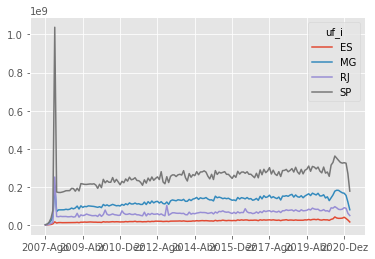

In [55]:
sudeste[['ES', 'MG', 'RJ', 'SP']].plot()

Remoção dos meses.<br>
**Tendencia:** Parece existir uma tendência de subida com o passar do tempo nos resultados
**Sazonalidade:** Parece existir uma sazonalidade nos resultados, aparentemente de um ano de período

<AxesSubplot:>

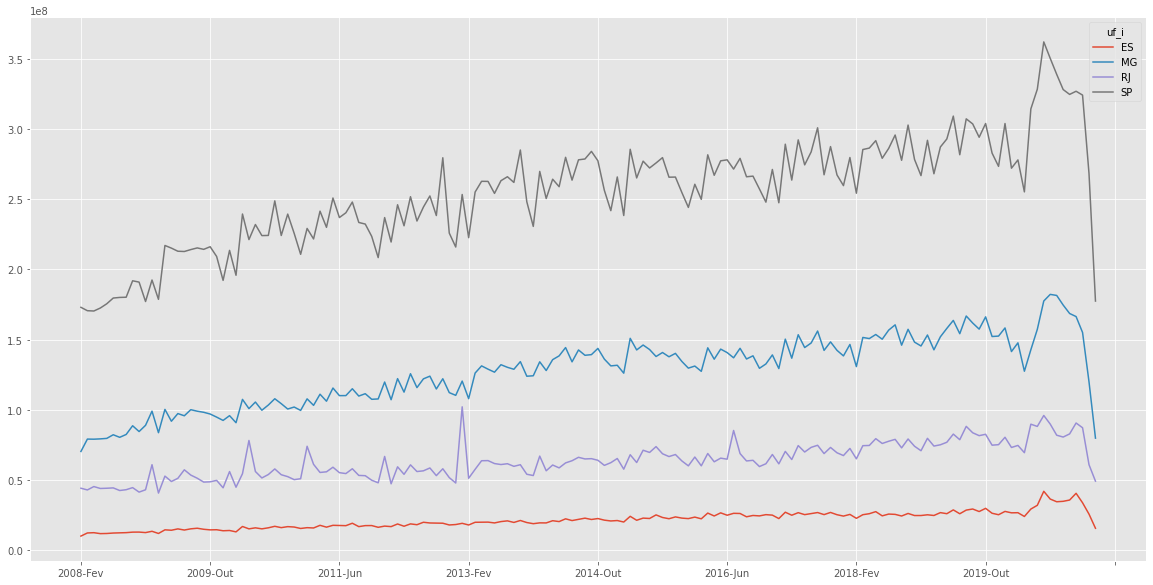

In [56]:
sudeste = sudeste.loc['2008-Fev':,:].copy()
sudeste[['ES', 'MG', 'RJ', 'SP']].plot(figsize=(20,10))

Essa sazonalidade parece ter o período de 1 ano, com o menor valor em atendimento sendo Dezembro, seguido por um pico em março

A sazonalidade é de 1 ano. Em SP aparentemente o mês de dezembro sempre é o que tem menos valor que os demais meses do mesmo ano.

<AxesSubplot:>

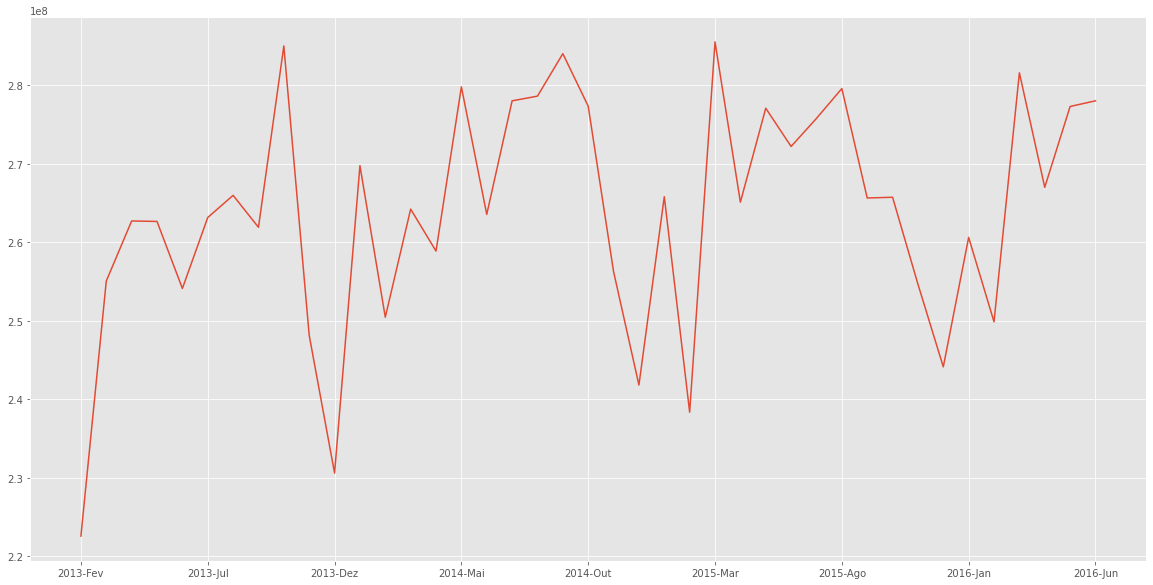

In [57]:
sudeste.loc['2013-Fev':'2016-Jun','SP'].plot(figsize=(20,10))

## 4. Desafios
Os desafios foram combinados em um único gráfico, uma vez que tanto a legenda quanto cortar para fazer com um conjunto menor de Estados são possíveis de realizar aqui.
Os dados já foram cortados e contém somente os estados que fazem parte da refição suldeste.
<br>
- [X] TEste

No handles with labels found to put in legend.


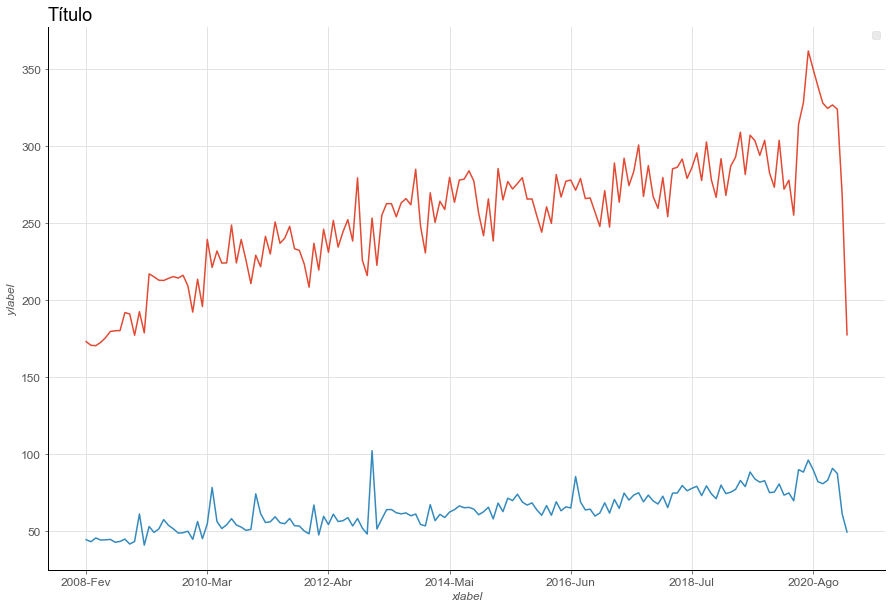

In [83]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x=sudeste.index.to_series(), y='SP', data=sudeste)
ax = sns.lineplot(x=sudeste.index.to_series(), y='RJ', data=sudeste)
ax.set_title('Título', fontsize=18, loc='left', family='Arial')
ax.set_xlabel('xlabel', fontsize=12, family='Arial', style='italic')
ax.set_ylabel('ylabel', fontsize=12, family='Arial', style='italic')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1)
ax.set_facecolor('xkcd:white')
ax.grid(b=True, axis='both', color='#DEDDDD', which='major')
plt.yticks(fontname = "Arial", fontsize=12)
plt.xticks(fontname = "Arial", fontsize=12)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.legend()
plt.show()

## 5. Resumo
*Curso de Boootcamp de DataScience Aplicado - Módulo 1 - Aula 1: Aquisição e leitura de dados reais*<br>
1. Aquisição e Leitura de dados reais
Nesse módulo os alunos tiveram a oportunidade de se expor aos problemas reais de quem trabalha com dados do governo, que entre outros, podemos citar:
    - Indisponíbilidade do serviço
    - Erro na fila de export dos dados
    - Dados com formato local (não americano)
Pudemos ver como identificar os problemas, e contorna-los ou corrigilos, seja por meio dos parâmetros do ```pd.read_csv```, seja no passo seguinte ao de criar o DataFrame.
2. Preparação dos dados
Esse módulo foi bem mais uma pesquisa minha, para trabalhar com os nomes das colunas de maneira que minimizem erro de digitação e fiquem mais apresentáveis.
    - Dividir (split) uma coluna em duas
    - Renomear (rename) a coluna com base em um dicionário
Essses foram alguns dos ensinamentos que eu tive nessa parte.
3. Exploração dos dados
Muuuuuuita documentação para identificar quais eram cada elemento do gráfico de maneira que fosse possível deixar o mais próximo da seguinte styleguide [Urban Institute of Data Visualization](http://urbaninstitute.github.io/graphics-styleguide/)